In [27]:
library(dplyr)
library(stringr)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [15]:
seoul_cctv_count <- read.csv("../../Data/cctv/서울_자치구별_cctv개수.csv")

In [11]:
seoul_crime <- read.csv("../../Data/cctv/서울_자치구별_5대범죄.csv")

In [22]:
seoul_cctv_class <- read.csv("../../Data/cctv/서울_자치구별_cctv분류.csv")

In [13]:
seoul_pop <- read.csv("../../Data/cctv/서울_자치구별_인구.csv")

In [14]:
seoul_elementary <- read.csv("../../Data/cctv/서울_자치구별_초등생수.csv")

In [461]:
seoul_data <- data.frame(년도 = rep(c('2015','2016','2017','2018','2019','2020'), each = 25))

In [462]:
seoul_data$자치구명 <- rep(seoul_cctv_count$구분,6)

In [463]:
head(seoul_data)

년도,자치구명
2015,강남구
2015,강동구
2015,강북구
2015,강서구
2015,관악구
2015,광진구


In [464]:
colnames(seoul_cctv_count)[2:7]

[1] "X2015년" "X2016년" "X2017년" "X2018년" "X2019년" "X2020년"

In [ ]:
seoul_cctv_count

In [465]:
result <- c()
for(i in colnames(seoul_cctv_count)[2:7]){
    result <- c(result, seoul_cctv_count[,i])
}
seoul_data$CCTV개수 <- result

In [466]:
head(seoul_data)

년도,자치구명,CCTV개수
2015,강남구,2319
2015,강동구,670
2015,강북구,608
2015,강서구,801
2015,관악구,1496
2015,광진구,638


In [55]:
seoul_pop <- subset(seoul_pop, 자치구 != '합계')

In [61]:
subset(seoul_pop, 기간 == c('2015'))
result <- subset(seoul_pop, 기간 == '2015')
for(i in c('2016','2017','2018','2019','2020')){
    result <- rbind(result, subset(seoul_pop, 기간 == i))
}

,기간,자치구,세대,계,남자,여자,인구밀도.명...,면적...,세대당인구,X65세이상고령자
80,2015,종로구,72645,163822,80531,83291,7022,23.91,2.13,24892
81,2015,중구,59321,134329,66755,67574,13854,9.96,2.12,20302
82,2015,용산구,107512,247909,121027,126882,11520,21.87,2.17,35715
83,2015,성동구,126714,305065,151459,153606,18190,16.85,2.34,38164
84,2015,광진구,158353,375180,183436,191744,22356,17.06,2.28,40368
85,2015,동대문구,159941,373824,185827,187997,26490,14.21,2.25,52490
86,2015,중랑구,176390,418620,208393,210227,22773,18.50,2.35,54095
87,2015,성북구,190973,469560,229183,240377,19747,24.58,2.40,63281
88,2015,강북구,141088,334426,164337,170089,14490,23.60,2.35,52598
89,2015,도봉구,136903,353241,173804,179437,17418,20.70,2.57,48590


In [97]:
arrange(result, desc(인구밀도))

기간,자치구,세대,계,남자,여자,인구밀도,면적...,세대당인구,X65세이상고령자
2015,양천구,179512,489010,242074,246936,28554,17.40,2.70,50398
2016,양천구,177434,481845,238163,243682,28554,17.40,2.69,52063
2017,양천구,176649,475018,234279,240739,28554,17.40,2.67,55234
2018,양천구,176498,468145,230457,237688,28554,17.40,2.63,58045
2019,양천구,177256,462285,227019,235266,28554,17.40,2.58,61264
2020,양천구,180633,457781,224379,233402,28554,17.40,2.51,65670
2015,동대문구,159941,373824,185827,187997,26490,14.21,2.25,52490
2016,동대문구,159426,370312,183444,186868,26490,14.21,2.23,53460
2017,동대문구,159938,366011,181185,184826,26490,14.21,2.19,55718
2018,동대문구,161820,364338,179774,184564,26490,14.21,2.15,57165


In [74]:
result1 <- arrange(subset(result, 기간 == '2015'), 자치구)
for(i in c('2016','2017','2018','2019','2020')){
    result1 <- rbind(result1, arrange(subset(result, 기간 == i), 자치구))
}
head(result1)

기간,자치구,세대,계,남자,여자,인구밀도.명...,면적...,세대당인구,X65세이상고령자
2015,강남구,237373,581760,279209,302551,14409,39.50,2.43,60330
2015,강동구,180508,463321,230851,232470,19846,24.59,2.54,51935
2015,강북구,141088,334426,164337,170089,14490,23.60,2.35,52598
2015,강서구,238952,595691,291216,304475,13885,41.43,2.47,67950
2015,관악구,249191,529031,266773,262258,18097,29.57,2.05,64985
2015,광진구,158353,375180,183436,191744,22356,17.06,2.28,40368


In [76]:
seoul_data <- cbind(seoul_data, result1[,3:ncol(result1)])

In [79]:
seoul_data <- seoul_data[,-c(6,7,9)]

In [83]:
seoul_elementary <- subset(seoul_elementary, 행정구역별 != "합계")

In [102]:
seoul_data

년도,자치구명,CCTV개수,세대,계,인구밀도.명...,세대당인구,X65세이상고령자
2015,강남구,2319,237373,581760,14409,2.43,60330
2015,강동구,670,180508,463321,19846,2.54,51935
2015,강북구,608,141088,334426,14490,2.35,52598
2015,강서구,801,238952,595691,13885,2.47,67950
2015,관악구,1496,249191,529031,18097,2.05,64985
2015,광진구,638,158353,375180,22356,2.28,40368
2015,구로구,1407,172321,454604,22475,2.45,53719
2015,금천구,990,103847,256167,19840,2.28,31070
2015,노원구,956,219768,578221,16763,2.61,68909
2015,도봉구,345,136903,353241,17418,2.57,48590


In [457]:
seoul_data <- cbind(seoul_data,arrange(subset(subset(seoul_crime, 자치구 != "합계"), 기간 != '2014'), 자치구)[,3:4])

In [458]:
seoul_data <- seoul_data[,-ncol(seoul_data)]

In [459]:
seoul_data <- seoul_data[,-8]

In [162]:
seoul_data_ML <- cbind(seoul_data_ML,seoul_data[,8:9])

In [101]:
arrange(seoul_elementary, desc(합계))

기간,행정구역별,합계
2020,송파구,33274
2019,송파구,33261
2018,송파구,32683
2017,송파구,32498
2019,강남구,27382
2017,노원구,27347
2020,강남구,27105
2018,강서구,26717
2018,강남구,26623
2019,강서구,26533


In [136]:
seoul_data_ML <- seoul_data

In [137]:
seoul_data_ML$자치구명 <- as.character(seoul_data_ML$자치구명)

In [142]:
for(i in 1:length(unique(seoul_data_ML$자치구명))){
    subset(seoul_data_ML, seoul_data_ML[,'자치구명'] == unique(seoul_data_ML$자치구명)[i])[,2] <- i
}
seoul_data_ML

ERROR: Error in subset(seoul_data_ML, seoul_data_ML[, "자치구명"] == unique(seoul_data_ML$자치구명)[i]) <- `*vtmp*`: 함수 "subset<-"를 찾을 수 없습니다


In [146]:
seoul_data_ML$자치구명 <- rep(c(1:25),6)

In [166]:
colnames(seoul_data_ML) <- c('년도', '자치구', 'CCTV개수', '세대수', '인구수', '인구밀도', '세대당인구', '범죄발생', '범죄검거')

In [168]:
str(seoul_data_ML)

'data.frame':	150 obs. of  9 variables:
 $ 년도      : Factor w/ 6 levels "2015","2016",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 자치구    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CCTV개수  : int  2319 670 608 801 1496 638 1407 990 956 345 ...
 $ 세대수    : int  237373 180508 141088 238952 249191 158353 172321 103847 219768 136903 ...
 $ 인구수    : int  581760 463321 334426 595691 529031 375180 454604 256167 578221 353241 ...
 $ 인구밀도  : int  14409 19846 14490 13885 18097 22356 22475 19840 16763 17418 ...
 $ 세대당인구: num  2.43 2.54 2.35 2.47 2.05 2.28 2.45 2.28 2.61 2.57 ...
 $ 범죄발생  : int  8617 8149 7720 7513 7304 7356 5244 4462 4261 3919 ...
 $ 범죄검거  : int  5732 5905 5321 5196 5069 5245 3171 3273 3245 2789 ...


In [169]:
library(caret)
library(e1071)
library(randomForest)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



In [172]:
seoul_data_ML_1 <- seoul_data_ML[,-1]

In [182]:
seoul_data_ML_2 <- subset(seoul_data_ML, 년도 != '2020')

In [183]:
seoul_data_ML_3 <- subset(seoul_data_ML, 년도 == '2020')

In [191]:
seoul_data_ML_2 <- seoul_data_ML_2[,-1]

In [206]:
head(seoul_data_ML_2)

자치구,CCTV개수,세대수,인구수,인구밀도,세대당인구,범죄발생,범죄검거
1,2319,237373,581760,14409,2.43,8617,5732
2,670,180508,463321,19846,2.54,8149,5905
3,608,141088,334426,14490,2.35,7720,5321
4,801,238952,595691,13885,2.47,7513,5196
5,1496,249191,529031,18097,2.05,7304,5069
6,638,158353,375180,22356,2.28,7356,5245


In [229]:
normalize <- function(x){
    return((x - min(x))/(max(x)-min(x)))
}

In [235]:
for(i in c(1,3,4,5,6,7)){
    seoul_data_ML_2[,i] <- normalize(seoul_data_ML_2[,i])
}
seoul_data_ML_2

자치구,CCTV개수,세대수,인구수,인구밀도,범죄발생,범죄검거
0.00000000,2319,0.81157756,0.81586654,0.3430708,1.0000000,0.9608154
0.04166667,670,0.55238160,0.59989935,0.5955787,0.9292838,1.0000000
0.08333333,608,0.37270158,0.36486620,0.3468326,0.8644606,0.8677237
0.12500000,801,0.81877478,0.84126897,0.3187349,0.8331822,0.8394111
0.16666667,1496,0.86544510,0.71971802,0.5143507,0.8016017,0.8106455
0.20833333,638,0.45139706,0.43917894,0.7121494,0.8094591,0.8505096
0.25000000,1407,0.51506450,0.58400436,0.7176760,0.4903294,0.3807475
0.29166667,990,0.20295364,0.22216509,0.5953000,0.3721668,0.4038505
0.33333333,956,0.73133233,0.80941336,0.4523964,0.3417951,0.3975085
0.37500000,345,0.35362596,0.39917434,0.4828163,0.2901179,0.2942242


In [237]:
model <- svm(CCTV개수~., data = seoul_data_ML_2)

In [236]:
head(seoul_data_ML_3[,-6])

자치구,CCTV개수,세대수,인구수,인구밀도,범죄발생,범죄검거
1,5796,234872,544055,14409,2969,2056
2,2475,196499,463998,19846,4745,3167
3,2337,145896,311569,14490,4501,3353
4,2346,266982,585901,13885,3883,3207
5,4071,274811,509803,18097,3590,2863
6,2375,167427,360109,22356,3880,3000


In [238]:
pred <- predict(model, seoul_data_ML_3[,-6])

In [244]:
1-abs(seoul_data_ML_3$CCTV개수 - pred)/seoul_data_ML_3$CCTV개수

1         2         3         4         5         6         7         8 
0.2647573 0.6200136 0.6566254 0.6541064 0.3769427 0.6461194 0.4441486 0.6829255 
        9        10        11        12        13        14        15        16 
0.7592942 0.4325500 0.7164022 0.7120805 0.6766021 0.6140590 0.4833177 0.4853047 
       17        18        19        20        21        22        23        24 
0.4980635 0.6469366 0.4893283 0.4721642 0.7201002 0.4472555 0.9944079 0.9645523 
       25 
0.4848447

In [273]:
ttt <- subset(seoul_crime, 자치구 != '합계')

In [274]:
ttt <- subset(ttt, 기간 != '2020')

In [293]:
arrange(subset(ttt, 기간 == '2014'),자치구)

기간,자치구,합계,합계.1
2014,강남구,8851,5262
2014,강동구,5392,3285
2014,강북구,4030,2806
2014,강서구,5289,3225
2014,관악구,6781,3701
2014,광진구,6268,3531
2014,구로구,5389,2985
2014,금천구,3842,2434
2014,노원구,5312,3300
2014,도봉구,3124,1986


In [288]:
result <- c()
for(i in c('2014','2015','2016','2017','2018','2019')){
    result <- c(result,arrange(ttt[ttt$기간==i,],자치구)[,3])
}; result

[1] 8851 5392 4030 5289 6781 6268 5389 3842 5312 3124 4363 3869 5740 4194 5558
 [16] 3582 4606 8004 4642 7003 3799 5431 5021 5231 5353 8617 5244 4257 5585 6345
 [31] 5909 5646 3781 5130 2664 4720 4074 5854 4029 5444 3358 4154 6778 4528 6867
 [46] 3820 4745 4705 4954 5193 8149 4462 4229 5450 5678 5322 5366 3645 4543 2438
 [61] 4787 3227 5873 3665 4989 3026 3744 6090 4112 6322 4137 4501 4459 4584 5041
 [76] 7720 4261 3393 5135 5525 4646 4895 3265 4209 1999 3975 3330 5278 3113 4708
 [91] 2767 3434 5576 3882 5969 4060 3883 4057 4184 4571 7513 3919 3437 4629 5026
[106] 3915 4810 3293 4007 2249 3680 3100 5172 2802 4726 2457 3042 5807 3515 5840
[121] 3411 3590 3690 4030 4288 7304 4014 3838 4924 5328 4011 4707 3105 4153 2110
[136] 3692 3400 4842 2943 5542 2512 2877 5698 3214 5820 3313 3880 3846 4327 4268

In [287]:
arrange(ttt[ttt$기간=="2014",],자치구)[,3]

[1] 8851 5392 4030 5289 6781 6268 5389 3842 5312 3124 4363 3869 5740 4194 5558
[16] 3582 4606 8004 4642 7003 3799 5431 5021 5231 5353

In [294]:
seoul_data_ML$전년도범죄발생 <- result

In [298]:
seoul_data_ML$범죄발생수차이 <- seoul_data_ML$범죄발생 - seoul_data_ML$전년도범죄발생 

In [299]:
cor(seoul_data_ML$CCTV개수, seoul_data_ML$범죄발생수차이)

[1] -0.2139653

In [302]:
seoul_data_ML_2016 <- seoul_data_ML[26:nrow(seoul_data_ML),]

In [303]:
seoul_data_ML_2016$CCTV개수증가 <- 

,년도,자치구,CCTV개수,세대수,인구수,인구밀도,세대당인구,범죄발생,범죄검거,전년도범죄발생,범죄발생수차이
26,2016,1,3447,234080,572140,14409,2.42,5678,3925,8617,-2939
27,2016,2,863,177460,448471,19846,2.50,5525,4154,5244,281
28,2016,3,840,141229,330704,14490,2.32,5026,3653,4257,769
29,2016,4,960,245045,602104,13885,2.43,5328,3810,5585,-257
30,2016,5,2048,251955,525607,18097,2.01,5261,3858,6345,-1084
31,2016,6,657,158390,372104,22356,2.26,5909,3707,5909,0
32,2016,7,1719,172220,449600,22475,2.42,5322,3312,5646,-324
33,2016,8,1090,104483,254654,19840,2.25,4646,3289,3781,865
34,2016,9,1268,219736,571212,16763,2.58,3915,2789,5130,-1215
35,2016,10,443,136898,350272,17418,2.54,4011,2816,2664,1347


In [307]:
seoul_data_ML_2016$CCTV증가수 <- seoul_data_ML_2016[,3] - seoul_data_ML[1:125,3]

In [309]:
seoul_data_ML_2016$면적 <- round(seoul_data_ML_2016$인구수 / seoul_data_ML_2016$인구밀도, 2)

In [318]:
head(seoul_data_ML_2016); str(seoul_data_ML_2016)

년도,자치구,CCTV개수,세대수,인구수,인구밀도,세대당인구,범죄발생,범죄검거,전년도범죄발생,범죄발생수차이,CCTV증가수,면적
2016,1,3447,234080,572140,14409,2.42,5678,3925,8617,-2939,1128,39.71
2016,2,863,177460,448471,19846,2.50,5525,4154,5244,281,193,22.60
2016,3,840,141229,330704,14490,2.32,5026,3653,4257,769,232,22.82
2016,4,960,245045,602104,13885,2.43,5328,3810,5585,-257,159,43.36
2016,5,2048,251955,525607,18097,2.01,5261,3858,6345,-1084,552,29.04
2016,6,657,158390,372104,22356,2.26,5909,3707,5909,0,19,16.64


'data.frame':	125 obs. of  13 variables:
 $ 년도          : Factor w/ 6 levels "2015","2016",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ 자치구        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CCTV개수      : int  3447 863 840 960 2048 657 1719 1090 1268 443 ...
 $ 세대수        : int  234080 177460 141229 245045 251955 158390 172220 104483 219736 136898 ...
 $ 인구수        : int  572140 448471 330704 602104 525607 372104 449600 254654 571212 350272 ...
 $ 인구밀도      : int  14409 19846 14490 13885 18097 22356 22475 19840 16763 17418 ...
 $ 세대당인구    : num  2.42 2.5 2.32 2.43 2.01 2.26 2.42 2.25 2.58 2.54 ...
 $ 범죄발생      : int  5678 5525 5026 5328 5261 5909 5322 4646 3915 4011 ...
 $ 범죄검거      : int  3925 4154 3653 3810 3858 3707 3312 3289 2789 2816 ...
 $ 전년도범죄발생: int  8617 5244 4257 5585 6345 5909 5646 3781 5130 2664 ...
 $ 범죄발생수차이: int  -2939 281 769 -257 -1084 0 -324 865 -1215 1347 ...
 $ CCTV증가수    : int  1128 193 232 159 552 19 312 100 312 98 ...
 $ 면적          : num  39.7 22.6 22.8 43.4 29 ...


In [317]:
summary(lm(CCTV개수~.,data = seoul_data_ML_2016))


Call:
lm(formula = CCTV개수 ~ ., data = seoul_data_ML_2016)

Residuals:
     Min       1Q   Median       3Q      Max 
-1264.88  -460.72   -68.36   414.54  1760.14 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -7.985e+03  2.673e+03  -2.988  0.00347 ** 
년도2017        2.513e+02  1.891e+02   1.329  0.18669    
년도2018        6.812e+02  2.044e+02   3.333  0.00117 ** 
년도2019        1.199e+03  2.115e+02   5.671 1.16e-07 ***
년도2020        1.626e+03  2.232e+02   7.285 5.14e-11 ***
자치구          1.356e+00  8.777e+00   0.155  0.87746    
세대수          3.695e-02  1.324e-02   2.792  0.00618 ** 
인구수         -1.994e-02  6.052e-03  -3.294  0.00133 ** 
인구밀도        8.162e-02  3.391e-02   2.407  0.01775 *  
세대당인구      3.022e+03  1.225e+03   2.467  0.01515 *  
범죄발생        1.558e-01  1.241e-01   1.255  0.21201    
범죄검거       -4.080e-01  1.931e-01  -2.113  0.03690 *  
전년도범죄발생  3.247e-01  7.725e-02   4.203 5.38e-05 ***
범죄발생수차이   

[1] 0.2875694

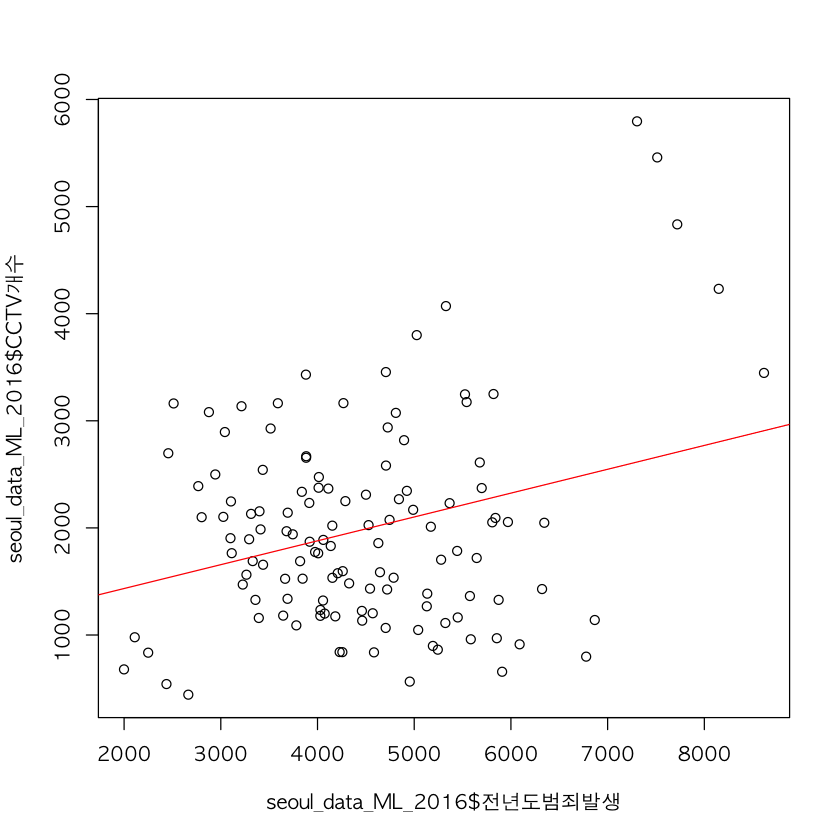

In [354]:
options(warn = -1)
par(family = "AppleGothic")
plot(seoul_data_ML_2016$CCTV개수 ~ seoul_data_ML_2016$전년도범죄발생)
abline(lm(seoul_data_ML_2016$CCTV개수 ~ seoul_data_ML_2016$전년도범죄발생, data = seoul_data_ML_2016), col='red')
cor(seoul_data_ML_2016$CCTV개수, seoul_data_ML_2016$전년도범죄발생)

[1] 0.4047963

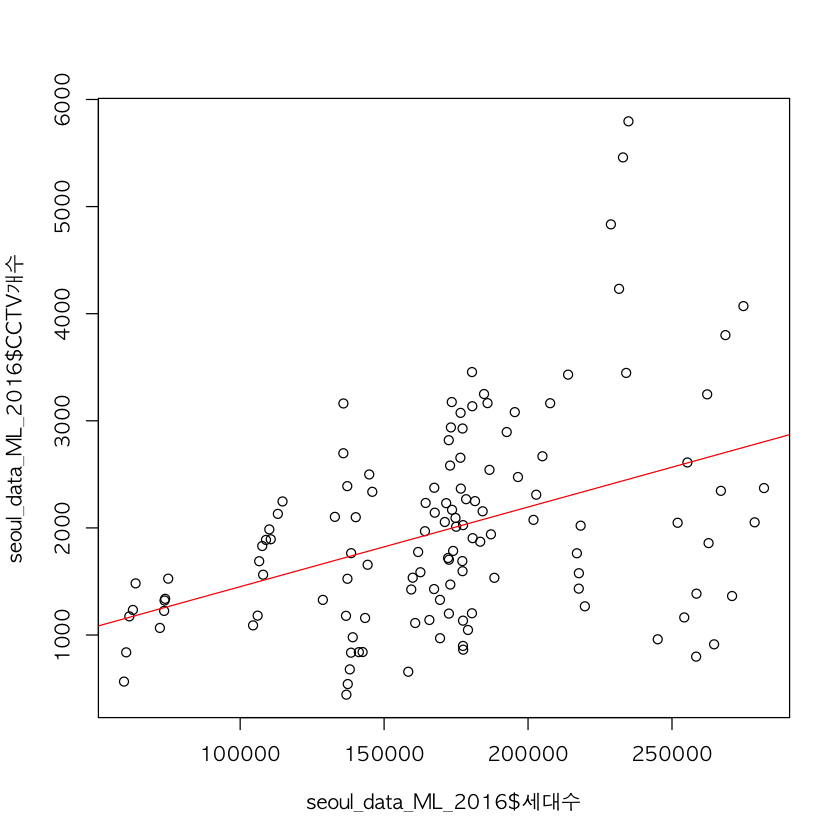

In [353]:
par(family = "AppleGothic")
plot(seoul_data_ML_2016$CCTV개수 ~ seoul_data_ML_2016$세대수)
abline(lm(seoul_data_ML_2016$CCTV개수 ~ seoul_data_ML_2016$세대수, data = seoul_data_ML_2016), col='red')
cor(seoul_data_ML_2016$CCTV개수, seoul_data_ML_2016$세대수)

[1] -0.2199808

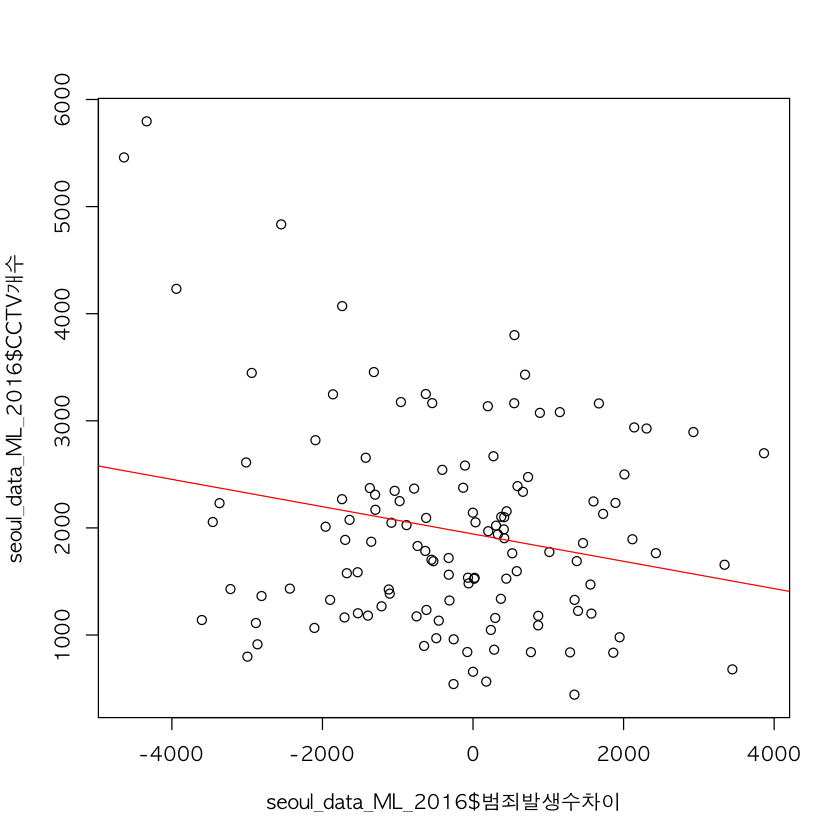

In [355]:
par(family = "AppleGothic")
plot(seoul_data_ML_2016$CCTV개수 ~ seoul_data_ML_2016$)
abline(lm(seoul_data_ML_2016$CCTV개수 ~ seoul_data_ML_2016$범죄발생수차이, data = seoul_data_ML_2016), col='red')
cor(seoul_data_ML_2016$CCTV개수, seoul_data_ML_2016$범죄발생수차이)

In [425]:
seoul_crime_1 <- cbind(subset(seoul_crime, 기간 != '2014' & 자치구 != '합계'), subset(seoul_crime, 기간 != '2020' & 자치구 != '합계'))

In [428]:
seoul_crime_1 <- seoul_crime_1[,c(1,2,3,7)]

In [432]:
subset(seoul_crime_1, 자치구 == '강남구')

,년도,자치구,범죄발생,전년도범죄발생
50,2015,강남구,8617,8851
76,2016,강남구,8149,8617
102,2017,강남구,7720,8149
128,2018,강남구,7513,7720
154,2019,강남구,7304,7513
180,2020,강남구,7356,7304


In [408]:
seoul_data_ML_2016$년도 <- as.character(seoul_data_ML_2016$년도)
seoul_data_ML_2016$년도 <- as.numeric(seoul_data_ML_2016$년도)

In [420]:
head(seoul_data_ML_2016); head(seoul_ML)

년도,자치구,CCTV개수,세대수,인구수,인구밀도,세대당인구,범죄발생,범죄검거,전년도범죄발생,범죄발생수차이,CCTV증가수,면적
2016,1,3447,234080,572140,14409,2.42,5678,3925,8617,-2939,1128,39.71
2016,2,863,177460,448471,19846,2.50,5525,4154,5244,281,193,22.60
2016,3,840,141229,330704,14490,2.32,5026,3653,4257,769,232,22.82
2016,4,960,245045,602104,13885,2.43,5328,3810,5585,-257,159,43.36
2016,5,2048,251955,525607,18097,2.01,5261,3858,6345,-1084,552,29.04
2016,6,657,158390,372104,22356,2.26,5909,3707,5909,0,19,16.64


CCTV개수,세대수,전년도범죄발생
3447,234080,8617
863,177460,5244
840,141229,4257
960,245045,5585
2048,251955,6345
657,158390,5909


In [415]:
seoul_ML1 <- seoul_ML
seoul_ML1 <- cbind(seoul_data_ML_2016[,c(1,2)],seoul_ML1,seoul_data_ML_2016[,c(8,11,12)])

In [402]:
subset(seoul_data_ML_2016, 자치구 == '1')

,년도,자치구,CCTV개수,세대수,인구수,인구밀도,세대당인구,범죄발생,범죄검거,전년도범죄발생,범죄발생수차이,CCTV증가수,면적
1,2016,1,3447,234080,572140,14409,2.42,5678,3925,8617,-2939,1128,39.71
26,2017,1,4232,231612,561052,14409,2.40,4209,3047,8149,-3940,785,38.94
51,2018,1,4834,228775,547453,14409,2.37,5172,3569,7720,-2548,602,37.99
76,2019,1,5459,232981,550209,14409,2.34,2877,2323,7513,-4636,625,38.19
101,2020,1,5796,234872,544055,14409,2.30,2969,2056,7304,-4335,337,37.76


In [357]:
seoul_ML <- seoul_data_ML_2016[,c(2,3,4,10)]

In [352]:
summary(lm(CCTV개수 ~ .-년도-인구수-인구밀도-세대당인구-범죄검거-CCTV증가수-면적, data = seoul_data_ML_2016))


Call:
lm(formula = CCTV개수 ~ . - 년도 - 인구수 - 인구밀도 - 
    세대당인구 - 범죄검거 - CCTV증가수 - 면적, 
    data = seoul_data_ML_2016)

Residuals:
     Min       1Q   Median       3Q      Max 
-1917.28  -602.73   -43.27   535.39  3118.15 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)    577.219793 541.029647   1.067  0.28816   
자치구          -3.432050  11.964153  -0.287  0.77471   
세대수           0.006208   0.001860   3.339  0.00112 **
범죄발생        -0.003563   0.073983  -0.048  0.96166   
전년도범죄발생   0.089887   0.073857   1.217  0.22597   
범죄발생수차이         NA         NA      NA       NA   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 886.9 on 120 degrees of freedom
Multiple R-squared:  0.1747,	Adjusted R-squared:  0.1472 
F-statistic: 6.349 on 4 and 120 DF,  p-value: 0.0001141


In [360]:
seoul_ML <- seoul_ML[,-1]

In [366]:
sample <- sample(nrow(seoul_ML), size=20)

In [379]:
data.tr <- seoul_ML[-sample,]
data.test <- seoul_ML[sample,]

In [368]:
data.test

,CCTV개수,세대수,전년도범죄발생
1,3447,234080,8617
2,863,177460,5244
4,960,245045,5585
5,2048,251955,6345
6,657,158390,5909
7,1719,172220,5646
10,443,136898,2664
11,1425,159426,4720
13,970,169432,5854
14,1179,136766,4029


In [380]:
ques <- subset(data.test, select = -CCTV개수)
ans <- data.test$CCTV개수

In [381]:
model <- svm(CCTV개수 ~ ., data = data.tr)

In [382]:
pred <- predict(model, ques)

In [390]:
abs((1 - abs(pred - ans)/ans)*100)

9       74      104      119       53       31       49      102 
70.25645 90.71410 71.60992 69.29230 29.57502 49.21083 63.15461 92.13736 
      55       30       12        8       56       61       98       62 
47.38592 58.53705 15.02707 36.45302 73.49771 78.46432 82.96378 70.87227 
       3       88       28       92 
30.66902 92.58616 32.73477 76.60402

In [392]:
median(sort(abs((1 - abs(pred - ans)/ans)*100)))

[1] 69.77437